<a href="https://colab.research.google.com/github/SultanGias15/Shield-Key-A-deep-learning-process-for-the-generation-of-hybrid-keys-in-Blockchain/blob/main/BlockChainKey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Final Code /Final Code1')

5000
Iterarion #0
Found prime! Count=1
Iterarion #1
Iterarion #2
Iterarion #3
Iterarion #4
Iterarion #5
Found prime! Count=2
Iterarion #6
Iterarion #7
Iterarion #8
Iterarion #9
Iterarion #10
Iterarion #11
Iterarion #12
Found prime! Count=3
[4444416188444444413307311444448167003331448483677076361411860007006679311670503763313113660033318433137670633144333607007319446663770761198866637777619988666367677188886663137776888833188177769888198998607399989999291071992929229296739921, 4444416188444444413307311444448167003331448483677076361411860007006679311670503763313113660033318433137670633144333607007319446663770761198866637777619988366367677188886663137776888833188177769888198998607399989999291071992929229296739921, 4444416188444444413307311444448167003331448483677076361411860007006679311670503763313113660033318433137670633144333607007319446663770761198866637777619988666467677188886663137776888833188177769888198998607399989999291071992929229296739923]
444441618844444441330731144444816700333

<Figure size 340x340 with 0 Axes>

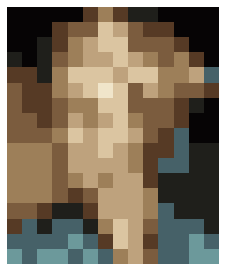

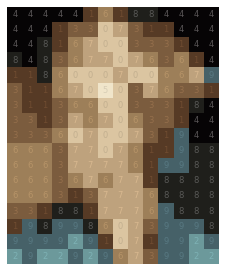

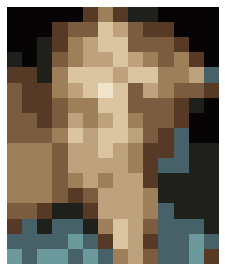

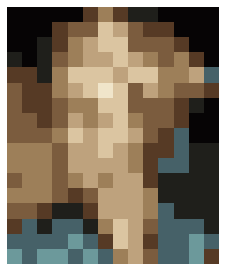

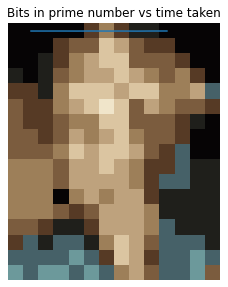

In [ ]:
#conributors:
#Palak Singhal 16co129
#Govind Jeevan

import random
import hashlib
import time
import matplotlib.pyplot as plt
import ContinuedFractions, Arithmetic, RSAvulnerableKeyGenerator
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(5000)

def hack_RSA(e,n):
    '''
    Finds d knowing (e,n)
    applying the Wiener continued fraction attack
    '''
    frac = ContinuedFractions.rational_to_contfrac(e, n)
    convergents = ContinuedFractions.convergents_from_contfrac(frac)

    for (k,d) in convergents:

        #check if d is actually the key
        if k!=0 and (e*d-1)%k == 0:
            phi = (e*d-1)//k
            s = n - phi + 1
            # check if the equation x^2 - s*x + n = 0
            # has integer roots
            discr = s*s - 4*n
            if(discr>=0):
                t = Arithmetic.is_perfect_square(discr)
                if t!=-1 and (s+t)%2==0:
                    print("Hacked!")
                    return d
# function to find extended gcd
def egcd(a, b):
	if a == 0:
		return (b, 0, 1)
	else:
		g, y, x = egcd(b % a, a)
		return (g, x - (b // a) * y, y)

# function to find modular inverse
def inverse(a,m):
	g,x,y = egcd(a,m)
	if g != 1:
		return None
	else:
		return x%m

# function to generate prime numbers
def generateprime(a,b):
	count=0
	while count<1:
		p= random.randint(a,b)
		if is_probable_prime(p):
			count+=1
	while count<2:
		q= random.randint(a,b)
		if is_probable_prime(q):
			if q!=p:
				count+=1
	return p,q


_mrpt_num_trials = 5 # number of bases to test

#To check if the number is prime
def is_probable_prime(n):
    assert n >= 2
    # special case 2
    if n == 2:
        return True
    # ensure n is odd
    if n % 2 == 0:
        return False
    # write n-1 as 2**s * d
    # repeatedly try to divide n-1 by 2
    s = 0
    d = n-1
    while True:
        quotient, remainder = divmod(d, 2)
        if remainder == 1:
            break
        s += 1
        d = quotient
    assert(2**s * d == n-1)

    # test the base a to see whether it is a witness for the compositeness of n
    def try_composite(a):
        if pow(a, d, n) == 1:
            return False
        for i in range(s):
            if pow(a, 2**i * d, n) == n-1:
                return False
        return True # n is definitely composite

    for i in range(_mrpt_num_trials):
        a = random.randrange(2, n)
        if try_composite(a):
            return False

    return True # no base tested showed n as composite


# To calculate gcd of two numbers
def gcd(a,b):
	while b!=0:
		a,b = b, a%b
	return a

# To generate keys e and d using prime numbers p and q
def generatekey(p,q):
	n= p*q
	phi = (p-1)*(q-1)
	g= 10
	while(g!=1):
		e= random.randrange(1,phi)
		g= gcd(e, phi)

	d= inverse(e, phi)

	return (e, d)

# Calculate xor of plaintext with key as well as ciphertext with key.
def xor(s1, s2):
 return "".join([chr(ord(c1) ^ ord(c2)) for (c1,c2) in zip(s1,s2)])



lis = []
n=1
x=[]
from PrimeSearcher import PrimeSearcher

###

ps = PrimeSearcher("./images/euler.jpg")
ps.rescale(15*15, fit_to_original=True)
num=ps.search(max_iterations=1000, noise_count=1, break_on_find=True)
print(num)

while n<11:
  start_time = time.time()
  p,q = num[0],num[1]
  print(p,q)
  public, private = generatekey(p,q)
  A= public
  B= private
  print("public key:", public, "private key:", private)
  g= random.randint(500,5000)

  r= num[2]
  print("shared prime ",r, "shared base ",g)
  X= pow(g,A,r)
  Y= pow(g,B,r)
  print("Alice sends", X, "Bob sends", Y)

  K1= pow(Y,A,r)
  K2= pow(X,B,r)
  Key1=hashlib.sha256(str(K1).encode('utf-8')).hexdigest()
  Key2=hashlib.sha256(str(K2).encode('utf-8')).hexdigest()

  print("Key I: ", Key1)
  print("Key II: ", Key2)
  '''message = input("enter message to be encrypted")'''
  message= 'palak'

  ciphertext = xor(message, Key1)
  print("Cipher Text " , ciphertext)
  messagetext = xor(ciphertext, Key2)
  print("Message Text " ,messagetext)
  print("--- %s seconds ---" % (time.time() - start_time))
  print ("n: ", n)
  x.append(n)
  lis.append(time.time()- start_time)

  times = 5
  while(times>0):
    e = public
    d = private
    print ("d = ", d)
    hacked_d = hack_RSA(e, p*q)
    if d == hacked_d:
      print ("Hack WORKED!")
    else:
      print ("Hack FAILED")
    print ("d = ", d, ", hacked_d = ", hacked_d)
    print ("-------------------------")
    times -= 1


  n= n+1

plt.plot(x, lis)
plt.xlabel('Number of bits ')
plt.ylabel('Time taken')
plt.title('Bits in prime number vs time taken')
plt.show()